In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os
import keras_tuner as kt
from tensorflow import keras 

In [2]:
img=image.load_img(r"D:\dataset_for_ml\10 obj classifier\training\cat\0_cat.png")

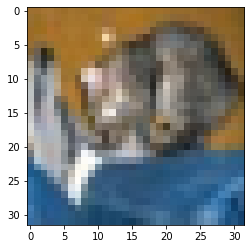

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"D:\dataset_for_ml\10 obj classifier\training\cat\0_cat.png").shape

(32, 32, 3)

In [5]:
cv2.imread(r"D:\dataset_for_ml\10 obj classifier\training\cat\0_cat.png")

array([[[ 49, 112, 158],
        [ 47, 111, 159],
        [ 51, 116, 165],
        ...,
        [ 36,  95, 137],
        [ 36,  91, 126],
        [ 33,  85, 116]],

       [[ 51, 112, 152],
        [ 40, 110, 151],
        [ 45, 114, 159],
        ...,
        [ 31,  95, 136],
        [ 32,  91, 125],
        [ 34,  88, 119]],

       [[ 47, 110, 151],
        [ 33, 109, 151],
        [ 36, 111, 158],
        ...,
        [ 34,  98, 139],
        [ 34,  95, 130],
        [ 33,  89, 120]],

       ...,

       [[177, 124,  68],
        [148, 100,  42],
        [137,  88,  31],
        ...,
        [146,  97,  38],
        [108,  64,  13],
        [127,  85,  40]],

       [[168, 116,  61],
        [148, 102,  49],
        [132,  85,  35],
        ...,
        [130,  82,  26],
        [126,  82,  29],
        [107,  64,  20]],

       [[160, 107,  54],
        [149, 105,  56],
        [132,  89,  45],
        ...,
        [124,  77,  24],
        [129,  84,  34],
        [110,  67,  21]]

# Models Inputs

In [6]:
batch_size=32
img_height=200
img_width=200
data_dir=r'D:\dataset_for_ml\10 obj classifier\training'

# Data Generator

In [7]:
data_gen=ImageDataGenerator(
                        horizontal_flip=True,
                        vertical_flip=True,
                        shear_range=0.2,
                        zoom_range=0.2,
                        width_shift_range=0.2,
                        height_shift_range=0.2
                        )


# Training Dataset

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2453 files belonging to 4 classes.
Using 1963 files for training.


# Validation dataset

In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2453 files belonging to 4 classes.
Using 490 files for validation.


# Classes Name

In [10]:
class_names=train_ds.class_names
print(class_names)

['car', 'cat', 'dog', 'frog']


# Some of the Images

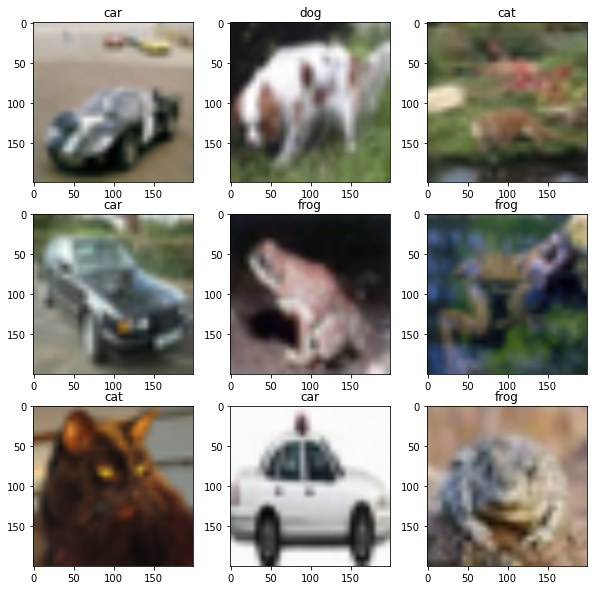

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [12]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


# Building model using Tuner

In [17]:
import keras_tuner as kt
from tensorflow import keras 
def build_model(hp):   ### function which optimizes the parameters
    model = keras.Sequential()
    
   
     
    model.add(keras.layers.Rescaling(1./255,input_shape=(img_height,img_width,3)))
    model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))
    
    model.add(keras.layers.Conv2D(64, 3,activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=2))
              
    model.add(keras.layers.Conv2D(32,3,activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=2))
              
    model.add(keras.layers.Conv2D(16,3,activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))
    
    model.add(keras.layers.Dropout(0.5))
              
    model.add(keras.layers.Flatten())
    
    
              
    model.add(keras.layers.Dense(hp.Choice("Dense layer",[64,128,256,512,1024]),activation='relu'))    ### hp.choice is going to choose any given parameter in this 5 different values for the numbers of filter can be used  

    model.add(keras.layers.Dense(4,activation='softmax'))
              
   

    ##loss functions
    model.compile(optimizer = 'adam',
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
              
    return model
              

tuner =kt.RandomSearch(
        build_model,
         objective='val_accuracy',  ### how good can it do in the test data
           #### numbers of running for different number of parameters after radnomly selecting any parameters
         )
              
tuner.search(train_ds,validation_data=val_ds,epochs=4,batch_size=batch_size)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


# Best model

In [18]:
model = tuner.get_best_models()[0]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 average_pooling2d (AverageP  (None, 65, 65, 3)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 63, 63, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

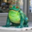

In [23]:
from IPython.display import Image
flower_path = r'D:\dataset_for_ml\cifar\train\19_frog.png'

Image(flower_path,width=200,height=200)

# Predicting 

In [25]:
flower_path = r'D:\dataset_for_ml\cifar\train\19_frog.png'

img = tf.keras.utils.load_img(
    flower_path, 
    target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} class"
    .format(class_names[np.argmax(score)])
)

This image most likely belongs to frog class


## Saving and Loading the best model

In [ ]:
model.save(r"D:\dataset_for_ml\10 obj classifier\model\mod")

In [ ]:
loaded_model=keras.models.load_model(r"D:\dataset_for_ml\10 obj classifier\model\mod")

In [ ]:
loaded_model.summary()